In [2]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

In [3]:
# define input data
X = torch.FloatTensor([(0,0), (0,1), (1,0), (1,1)])
X

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [4]:
ones = torch.ones([4,1]) #1은 bias 때문에 붙여줌
ones

tensor([[1.],
        [1.],
        [1.],
        [1.]])

In [6]:
input_X = torch.hstack((X, ones)) # column_stack
print(input_X.T) #hstack : 수평으로 합침

tensor([[0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [1., 1., 1., 1.]])


In [7]:
input_X

tensor([[0., 0., 1.],
        [0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 1.]])

In [8]:
weight = torch.FloatTensor([(3,3,-4)])
weight

tensor([[ 3.,  3., -4.]])

In [9]:
weight @ input_X.T #@ 는 행렬 곱

tensor([[-4., -1., -1.,  2.]])

In [10]:
result = weight @ input_X.T #행렬곱
result.T # 전치하여 가로를 세로로 표현

tensor([[-4.],
        [-1.],
        [-1.],
        [ 2.]])

In [11]:
input_w1 = torch.FloatTensor([(3,3,-4)])
input_w2 = torch.FloatTensor([(-4,-4,2)])

print(input_w1)
print(input_w2)

tensor([[ 3.,  3., -4.]])
tensor([[-4., -4.,  2.]])


In [12]:
#Sigmoid
sig_x = torch.FloatTensor(list(range(-100, 100))) / 10

sig_y = 1 / (1+torch.exp(-sig_x)) #sigmoid 함수

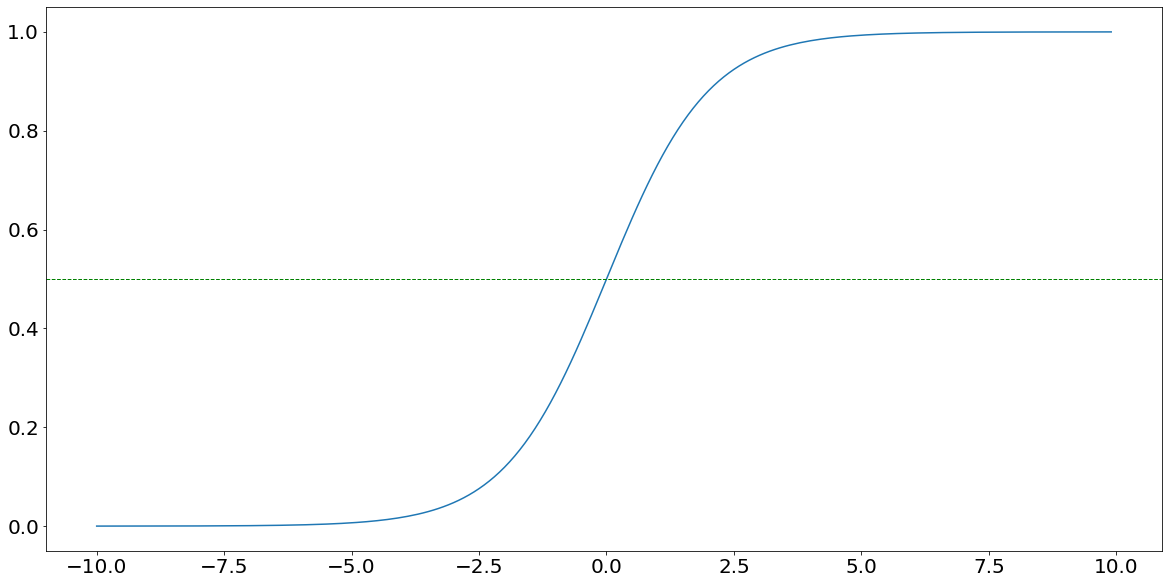

In [13]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(sig_x, sig_y)
plt.axhline(y=0.5, color='g', linestyle='--', linewidth=1)

In [14]:
sig_y = 1 / (1+torch.exp(-sig_x))
sig_y1 = (torch.exp(sig_x)-torch.exp(-sig_x)) / (torch.exp(sig_x) + torch.exp(-sig_x))
sig_y2 = sig_x / torch.sqrt(1 + torch.square(sig_x))

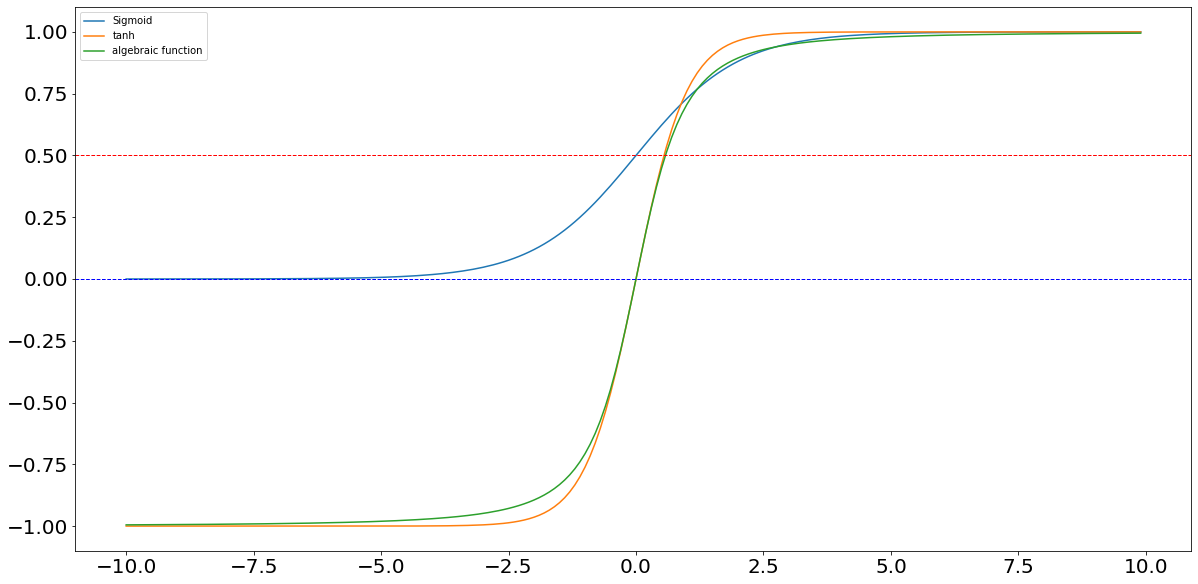

In [15]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(sig_x, sig_y)
plt.plot(sig_x, sig_y1)
plt.plot(sig_x, sig_y2)

plt.legend(["Sigmoid", "tanh", "algebraic function"])

plt.axhline(y=0.5, color='r', linestyle='--', linewidth=1)
plt.axhline(y=0.0, color='b', linestyle='--', linewidth=1)

In [19]:
def sig_function(x):
    exp_X = 1 / (1+torch.exp(-x)) #sigmoid 함수
    output = torch.where(exp_X > 0.5, 1, 0) #0.5보다 크면 1 아니면 0
    return output

In [20]:
mat_mul01 = input_w1 @ input_X.T
mat_mul01 = mat_mul01.T
print(mat_mul01)

tensor([[-4.],
        [-1.],
        [-1.],
        [ 2.]])


In [21]:
m_01 = sig_function(mat_mul01)
print(m_01)

tensor([[0],
        [0],
        [0],
        [1]])


In [28]:
mat_mul02 = input_w2 @ input_X.T
mat_mul02 = mat_mul02.T
print(mat_mul02)

m_02 = sig_function(mat_mul02)
print(m_02)

tensor([[ 2.],
        [-2.],
        [-2.],
        [-6.]])
tensor([[1],
        [0],
        [0],
        [0]])


In [29]:
#Make All
input_W = torch.FloatTensor([(3,3,-4), (-4,-4,2)])
input_W

tensor([[ 3.,  3., -4.],
        [-4., -4.,  2.]])

In [30]:
input_X.T #전치

tensor([[0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [1., 1., 1., 1.]])

In [31]:
matmul = input_W @ input_X.T
matmul

tensor([[-4., -1., -1.,  2.],
        [ 2., -2., -2., -6.]])

In [32]:
matmul = matmul.T
matmul

tensor([[-4.,  2.],
        [-1., -2.],
        [-1., -2.],
        [ 2., -6.]])

In [33]:
m = sig_function(matmul)
print(m)

tensor([[0, 1],
        [0, 0],
        [0, 0],
        [1, 0]])


In [34]:
hidden_X = torch.column_stack((m, ones)) #column_stack 은 hstack 이랑 같음
print(hidden_X)

tensor([[0., 1., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 1.]])


In [36]:
hidden_W = torch.FloatTensor([(-6,-6,3)])
hidden_W

tensor([[-6., -6.,  3.]])

In [37]:
hidden_X

tensor([[0., 1., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 1.]])

In [38]:
out_mul = hidden_W @ hidden_X.T
out_mul = out_mul.T
print(out_mul)

tensor([[-3.],
        [ 3.],
        [ 3.],
        [-3.]])


In [39]:
output = sig_function(out_mul)
print(output)

tensor([[0],
        [1],
        [1],
        [0]])


In [40]:
#W와 b의 값을 찾았다. 이제 자동적으로 찾을려고 한다.
# define input data x,y data를 다시 한 번 선언
X = torch.FloatTensor([(0,0), (0,1), (1,0), (1,1)])


In [41]:
y = torch.FloatTensor([0,1,1,0])
y

tensor([0., 1., 1., 0.])

In [42]:
y = y.reshape(4,1)
print(y)

tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [43]:
linear1 = torch.nn.Linear(2,2)
sigmoid = torch.nn.Sigmoid()
linear2 = torch.nn.Linear(2,1)

In [47]:
#Sequential : 레이어를 연결
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid)
model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [48]:
epoch = 30000
learning_rate=3

In [50]:
#CrossEntropyLoss
loss_function = torch.nn.BCELoss()
#먼저 optimizer 는 SGD로 설정
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [51]:
loss_arr=[]
for num_epoch in range(epoch):
    optimizer.zero_grad()
    
    prediction = model(X)
    loss = loss_function(prediction, y) #(예측값, 실제값)
    
    loss.backward()
    optimizer.step()
    
    loss_arr.append(loss.item())
    
    if num_epoch % 5000 == 0:
        print("epoch --> {}\tloss ==> {:.5f}".format(num_epoch, loss))
        
print("Finish train")

epoch --> 0	loss ==> 0.72997
epoch --> 5000	loss ==> 0.00065
epoch --> 10000	loss ==> 0.00031
epoch --> 15000	loss ==> 0.00021
epoch --> 20000	loss ==> 0.00015
epoch --> 25000	loss ==> 0.00012
Finish train


In [52]:
X

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [53]:
with torch.no_grad(): #기울기 필요없음
    predicted_test = model(X)
print(predicted_test)

tensor([[9.6647e-05],
        [9.9986e-01],
        [9.9991e-01],
        [8.5583e-05]])


In [54]:
print(predicted_test.tolist())

[[9.6646930614952e-05], [0.9998646974563599], [0.9999091625213623], [8.558341505704448e-05]]


In [55]:
result=[]

for output in predicted_test:
    if output < 0.5:
        output = 0
    else:
        output = 1
    result.append(output)
result

[0, 1, 1, 0]

In [56]:
#Check Parameters
parameters = []
for names, param in model.named_parameters():
    print("names", names)
    print("param", param)
    
    parameters.append(param)

names 0.weight
param Parameter containing:
tensor([[ 8.3101, -8.5618],
        [ 8.7369, -8.4578]], requires_grad=True)
names 0.bias
param Parameter containing:
tensor([-4.3474,  4.2079], requires_grad=True)
names 2.weight
param Parameter containing:
tensor([[ 19.4399, -18.9453]], requires_grad=True)
names 2.bias
param Parameter containing:
tensor([9.1749], requires_grad=True)


In [57]:
parameters

[Parameter containing:
 tensor([[ 8.3101, -8.5618],
         [ 8.7369, -8.4578]], requires_grad=True),
 Parameter containing:
 tensor([-4.3474,  4.2079], requires_grad=True),
 Parameter containing:
 tensor([[ 19.4399, -18.9453]], requires_grad=True),
 Parameter containing:
 tensor([9.1749], requires_grad=True)]

In [58]:
parameters[1]
parameters[0].shape

torch.Size([2, 2])

In [59]:
in_weight = parameters[0]
in_bias = parameters[1].reshape(1,-1).T

In [60]:
print(in_weight)
print(in_bias)

Parameter containing:
tensor([[ 8.3101, -8.5618],
        [ 8.7369, -8.4578]], requires_grad=True)
tensor([[-4.3474],
        [ 4.2079]], grad_fn=<PermuteBackward0>)


In [61]:
# cat으로 연산을 했으니 CatBackward 
# cat은 두개 이상의 텐서를 합친다.
input_W = torch.cat((in_weight, in_bias), 1)
print(input_W)

tensor([[ 8.3101, -8.5618, -4.3474],
        [ 8.7369, -8.4578,  4.2079]], grad_fn=<CatBackward0>)


In [62]:
input_X

tensor([[0., 0., 1.],
        [0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 1.]])

In [63]:
matmul = input_W @ input_X.T
matmul = matmul.T
print(matmul)

#sigmoid
exp_matmul = 1 / (1+torch.exp(-matmul))

print(exp_matmul)

hidden_X = torch.column_stack((exp_matmul, ones))
print(hidden_X)


tensor([[ -4.3474,   4.2079],
        [-12.9092,  -4.2498],
        [  3.9627,  12.9448],
        [ -4.5991,   4.4870]], grad_fn=<PermuteBackward0>)
tensor([[1.2775e-02, 9.8534e-01],
        [2.4752e-06, 1.4066e-02],
        [9.8134e-01, 1.0000e+00],
        [9.9611e-03, 9.8887e-01]], grad_fn=<MulBackward0>)
tensor([[1.2775e-02, 9.8534e-01, 1.0000e+00],
        [2.4752e-06, 1.4066e-02, 1.0000e+00],
        [9.8134e-01, 1.0000e+00, 1.0000e+00],
        [9.9611e-03, 9.8887e-01, 1.0000e+00]], grad_fn=<CatBackward0>)


In [64]:
hid_weight = parameters[2]
hid_bias = parameters[3].reshape(1,-1).T

print(hid_weight)
print(hid_bias)

hidden_W = torch.cat((hid_weight, hid_bias), 1)
print(hidden_W)

Parameter containing:
tensor([[ 19.4399, -18.9453]], requires_grad=True)
tensor([[9.1749]], grad_fn=<PermuteBackward0>)
tensor([[ 19.4399, -18.9453,   9.1749]], grad_fn=<CatBackward0>)


In [65]:
out_mul = hidden_W @ hidden_X.T
out_mul = out_mul.T
print(out_mul)

tensor([[-9.2443],
        [ 8.9084],
        [ 9.3069],
        [-9.3659]], grad_fn=<PermuteBackward0>)


In [66]:
exp_matmul = 1 / (1+torch.exp(-out_mul))
print(exp_matmul)

tensor([[9.6647e-05],
        [9.9986e-01],
        [9.9991e-01],
        [8.5583e-05]], grad_fn=<MulBackward0>)


In [67]:
print(predicted_test)

tensor([[9.6647e-05],
        [9.9986e-01],
        [9.9991e-01],
        [8.5583e-05]])
